In [67]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as dts
import math as m

In [2]:
def Interpolation1D(x,y,xi,iType):
    
    if iType == 'LI':
        yi = interp1d(x,y,'linear')(xi)
    elif iType == 'RI':
        y = np.multiply(y,x)
        yi = np.divide(interp1d(x,y,'linear')(xi),(xi + (xi == 0)))
    return yi

In [3]:
x = [-1.01, 2.20, 5.66, 5.69, 13.77, 20.89]
y = [0.28773, 0.650, 1.036889, 1.043178, 1.595322, 1.543763]

In [4]:
ynew = Interpolation1D(x,y,8,'LI')
ynew

array(1.20103105)

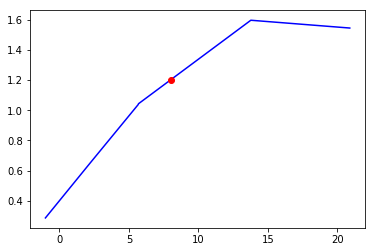

In [5]:
plt.plot(x,y,'b-',8,ynew,'ro');

In [22]:
df_Dates = pd.read_excel('zeroCurveDates.xls')
df_Dates.head()

,1,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
0,2011-03-30,2011-03-31,2011-04-01,2011-04-04,2011-04-05,2011-04-06,2011-04-07,2011-04-08,2011-04-11,2011-04-12,...,2012-03-16,2012-03-19,2012-03-20,2012-03-22,2012-03-23,2012-03-26,2012-03-27,2012-03-28,2012-03-29,2012-03-30
1,2011-03-31,2011-04-01,2011-04-04,2011-04-05,2011-04-06,2011-04-07,2011-04-08,2011-04-11,2011-04-12,2011-04-13,...,2012-03-19,2012-03-20,2012-03-22,2012-03-23,2012-03-26,2012-03-27,2012-03-28,2012-03-29,2012-03-30,2012-04-02
2,2011-04-29,2011-04-29,2011-05-03,2011-05-04,2011-05-05,2011-05-06,2011-05-09,2011-05-09,2011-05-11,2011-05-12,...,2012-04-16,2012-04-19,2012-04-20,2012-04-23,2012-04-23,2012-04-26,2012-04-30,2012-04-30,2012-04-30,2012-04-30
3,2011-06-30,2011-06-30,2011-07-01,2011-07-04,2011-07-05,2011-07-06,2011-07-07,2011-07-08,2011-07-11,2011-07-12,...,2012-06-18,2012-06-19,2012-06-20,2012-06-22,2012-06-25,2012-06-26,2012-06-27,2012-06-28,2012-06-29,2012-06-29
4,2011-07-29,2011-07-29,2011-08-01,2011-08-04,2011-08-05,2011-08-08,2011-08-08,2011-08-08,2011-08-11,2011-08-12,...,2012-07-16,2012-07-19,2012-07-20,2012-07-23,2012-07-23,2012-07-26,2012-07-27,2012-07-30,2012-07-30,2012-07-30


In [23]:
df_Rates = pd.read_excel('zeroCurveRates.xls')
df_Rates.head()

,1,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
0,0.0523,0.0523,0.0523,0.0523,0.0523,0.0523,0.0523,0.0523,0.0523,0.0523,...,0.0524,0.0524,0.0524,0.0524,0.0525,0.0525,0.0526,0.0526,0.0526,0.0526
1,0.0523,0.0523,0.0523,0.0523,0.0523,0.0523,0.0523,0.0523,0.0523,0.0523,...,0.0524,0.0524,0.0524,0.0524,0.0525,0.0525,0.0526,0.0526,0.0526,0.0526
2,0.0549,0.0549,0.0549,0.0549,0.0549,0.0549,0.0549,0.0549,0.0549,0.0549,...,0.0547,0.0547,0.0547,0.0547,0.0547,0.0547,0.0547,0.0547,0.0547,0.0547
3,0.0554,0.0554,0.0554,0.0554,0.0554,0.0554,0.0554,0.0554,0.0554,0.0554,...,0.0556,0.0556,0.0556,0.0556,0.0556,0.0556,0.0556,0.0556,0.0556,0.0556
4,0.0555,0.0554,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,...,0.0555,0.0555,0.0557,0.0555,0.0555,0.0555,0.0556,0.0556,0.0555,0.0555


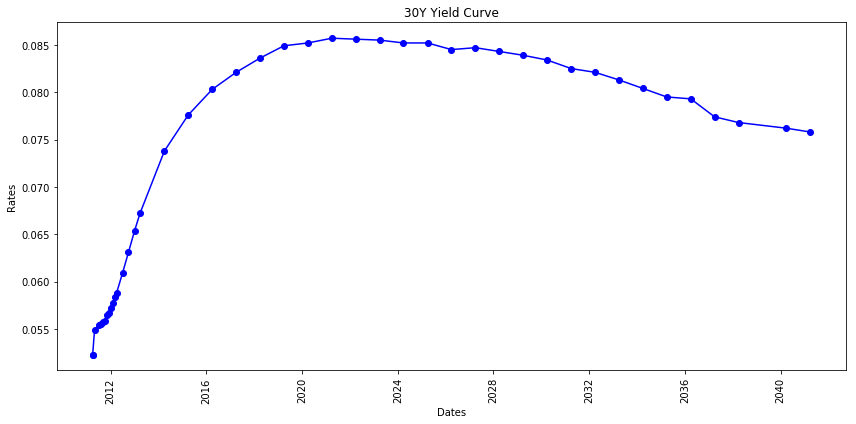

In [24]:
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
plt.figure(num=None, figsize=(12, 6))
plt.xlabel('Dates')
plt.ylabel('Rates')
plt.title('30Y Yield Curve')
plt.plot(df_Dates.iloc[:,0],df_Rates.iloc[:,0],'b-o')
plt.xticks(rotation=90)
plt.tight_layout();

In [25]:
ynew = Interpolation1D(dts.date2num(df_Dates.iloc[:,0]),df_Rates.iloc[:,0],dts.date2num((datetime(2016,9,30))),'LI')
ynew

array(0.0812074)

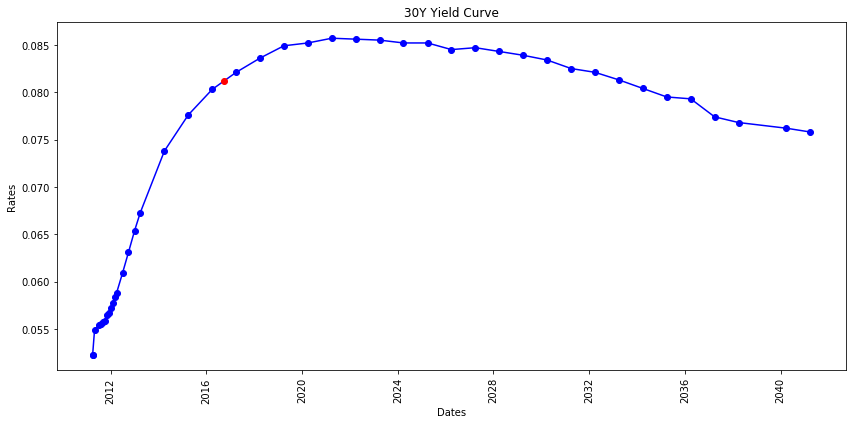

In [26]:
plt.figure(num=None, figsize=(12, 6))
plt.xlabel('Dates')
plt.ylabel('Rates')
plt.title('30Y Yield Curve')
plt.plot(df_Dates.iloc[:,0],df_Rates.iloc[:,0],'b-o',datetime(2016,9,30),ynew,'ro')
plt.xticks(rotation=90)
plt.tight_layout();

In [71]:
def EquityForwardContractPrice(valueDate,maturityDate,spotPrice,dividendYieldCurve,zeroCurve,iType,outputType):
    
    # one limitation is not having a dividend curve out beyond 1Y.
    #have to explicitly convert to numbers to create year fractions
    valueDate=dts.date2num(valueDate)
    maturityDate=dts.date2num(maturityDate)
    dividendYieldCurve.iloc[:,0]=dts.date2num(dividendYieldCurve.iloc[:,0])
    zeroCurve.iloc[:,0]=dts.date2num(zeroCurve.iloc[:,0])
    
    zeroCurve.iloc[:,0] = np.divide(zeroCurve.iloc[:,0]-valueDate,365)
    dividendYieldCurve.iloc[:,0] = np.divide(dividendYieldCurve.iloc[:,0]-valueDate,365)
    rYearFrac = (maturityDate - valueDate)/365;
    
    rZeroRate = Interpolation1D(zeroCurve.iloc[:,0],zeroCurve.iloc[:,1],rYearFrac,iType);
    rDividendYield = Interpolation1D(dividendYieldCurve.iloc[:,0],dividendYieldCurve.iloc[:,1],rYearFrac,iType);
    
    if outputType == 'FCP':
        return spotPrice*m.exp((rZeroRate - rDividendYield)*rYearFrac)
    elif outputType == 'DDS':
        return m.exp((rZeroRate - rDividendYield)*rYearFrac)
    elif outputType == 'DDR':
        return spotPrice*m.exp((rZeroRate - rDividendYield)*rYearFrac)*rYearFrac
    elif outputType == 'DDD':
        return -spotPrice*m.exp((rZeroRate - rDividendYield)*rYearFrac)*rYearFrac
    elif outputType == 'DDT':
        return spotPrice*m.exp((rZeroRate - rDividendYield)*rYearFrac)*(-rZeroRate + rDividendYield)
    

In [79]:
zeroCurve=pd.DataFrame(columns=['Dates','Rates'])
zeroCurve['Dates']=df_Dates.iloc[:,0]
zeroCurve['Rates']=df_Rates.iloc[:,0]
zeroCurve

,Dates,Rates
0,2011-03-30,0.0523
1,2011-03-31,0.0523
2,2011-04-29,0.0549
3,2011-06-30,0.0554
4,2011-07-29,0.0555
5,2011-08-30,0.0557
6,2011-09-30,0.0559
7,2011-10-31,0.0565
8,2011-11-30,0.0567
9,2011-12-30,0.0572


In [99]:
dividendYieldCurve=pd.read_excel('Practical - Options.xlsx','Sheet1')
dividendYieldCurve

,Dates,Rates
0,2011-03-30,0.045149
1,2011-04-29,0.045149
2,2011-06-28,0.045630
3,2011-08-27,0.045959
4,2011-09-26,0.046133
5,2011-10-26,0.046680
6,2011-11-25,0.046945
7,2011-12-25,0.047393
8,2012-01-24,0.047905
9,2012-02-23,0.048534


In [81]:
EquityForwardContractPrice(datetime(2011,3,30),datetime(2011,9,30),100,dividendYieldCurve,zeroCurve,'LI','FCP')

100.48987253171622

In [93]:
zeroCurve=pd.DataFrame(columns=['Dates','Rates'])
zeroCurve['Dates']=df_Dates.iloc[:,0]
zeroCurve['Rates']=df_Rates.iloc[:,0]
zeroCurve.head()

,Dates,Rates
0,2011-03-30,0.0523
1,2011-03-31,0.0523
2,2011-04-29,0.0549
3,2011-06-30,0.0554
4,2011-07-29,0.0555


This is just to check that coverting to number gives correct days between dates

In [84]:
zeroCurve.iloc[0,0]

Timestamp('2011-03-30 00:00:00')

In [85]:
zeroCurve.iloc[3,0]

Timestamp('2011-06-30 00:00:00')

In [86]:
zeroCurve.iloc[3,0]-zeroCurve.iloc[0,0]

Timedelta('92 days 00:00:00')

In [88]:
dts.date2num(zeroCurve.iloc[3,0])-dts.date2num(zeroCurve.iloc[0,0])

92.0

This is to check that the code is creating correct year fractions

In [94]:
valueDate=datetime(2011,3,30) 
valueDate=dts.date2num(valueDate)
zeroCurve.iloc[:,0]=dts.date2num(zeroCurve.iloc[:,0])
zeroCurve.iloc[:,0] = np.divide(zeroCurve.iloc[:,0]-valueDate,365)
zeroCurve.iloc[:,0]

0      0.000000
1      0.002740
2      0.082192
3      0.252055
4      0.331507
5      0.419178
6      0.504110
7      0.589041
8      0.671233
9      0.753425
10     0.838356
11     0.920548
12     1.002740
13     1.252055
14     1.501370
15     1.758904
16     1.997260
17     3.005479
18     4.002740
19     5.005479
20     6.005479
21     7.002740
22     8.002740
23     9.008219
24    10.008219
25    11.008219
26    12.008219
27    13.005479
28    14.013699
29    15.010959
30    16.010959
31    17.013699
32    18.010959
33    19.010959
34    20.016438
35    21.016438
36    22.016438
37    23.016438
38    24.016438
39    25.021918
40    26.019178
41    27.019178
42    29.019178
43    30.019178
Name: Dates, dtype: float64

In [100]:
dividendYieldCurve.iloc[:,0]=dts.date2num(dividendYieldCurve.iloc[:,0])
dividendYieldCurve.iloc[:,0] = np.divide(dividendYieldCurve.iloc[:,0]-valueDate,365)
dividendYieldCurve.iloc[:,0]

0     0.000000
1     0.082192
2     0.246575
3     0.410959
4     0.493151
5     0.575342
6     0.657534
7     0.739726
8     0.821918
9     0.904110
10    1.000000
Name: Dates, dtype: float64